In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits, load_iris
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

from sklearn.metrics import normalized_mutual_info_score
from sklearn.mixture import GaussianMixture







In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ANALIS DE LA DATA

In [8]:
df_features = pd.read_csv("/content/drive/MyDrive/movie_project/poster_features.csv")
print("Dataset cargado:", df_features.shape)
datos = df_features
datos.info()
df_features.head()

Dataset cargado: (19669, 106)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19669 entries, 0 to 19668
Columns: 106 entries, tmdbId to feat_104
dtypes: float64(105), int64(1)
memory usage: 15.9 MB


,tmdbId,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104
0,862,0.013468,0.034281,0.023722,0.018392,0.014404,0.002035,0.002421,0.003153,0.003947,...,0.013224,0.049255,0.069519,0.046753,0.096191,0.172607,0.128174,0.055847,0.083862,0.297791
1,8844,0.071350,0.013346,0.040609,0.094442,0.032979,0.014445,0.008423,0.002563,0.001017,...,0.009928,0.037292,0.067322,0.048767,0.103455,0.189697,0.117798,0.054504,0.059143,0.322021
2,15602,0.042480,0.068746,0.136861,0.009155,0.001078,0.000732,0.000407,0.000468,0.000448,...,0.099711,0.054749,0.075256,0.041321,0.092712,0.145325,0.142395,0.055298,0.086853,0.306091
3,31357,0.059611,0.104309,0.036153,0.005249,0.000407,0.003092,0.000407,0.000468,0.001648,...,0.111755,0.034851,0.058472,0.035095,0.105469,0.187866,0.172729,0.053650,0.078308,0.273560
4,11862,0.154378,0.039795,0.086609,0.007629,0.001282,0.003418,0.000387,0.000183,0.000427,...,0.113932,0.024048,0.047363,0.035278,0.091064,0.195557,0.140076,0.043579,0.061523,0.361511


 Valores nulos por columna:
tmdbId      0
feat_0      0
feat_1      0
feat_2      0
feat_3      0
           ..
feat_100    0
feat_101    0
feat_102    0
feat_103    0
feat_104    0
Length: 106, dtype: int64

 Estadísticas descriptivas:
            count       mean        std    min        25%        50%  \
tmdbId    19669.0  25351.070  15932.502  2.000  11536.000  24056.000   
feat_0    19669.0      0.075      0.073  0.000      0.019      0.048   
feat_1    19669.0      0.031      0.032  0.000      0.008      0.022   
feat_2    19669.0      0.029      0.032  0.000      0.007      0.019   
feat_3    19669.0      0.027      0.037  0.000      0.005      0.015   
...           ...        ...        ...    ...        ...        ...   
feat_100  19669.0      0.170      0.052  0.008      0.134      0.171   
feat_101  19669.0      0.138      0.033  0.010      0.120      0.137   
feat_102  19669.0      0.054      0.015  0.001      0.044      0.057   
feat_103  19669.0      0.073      0.018  0.

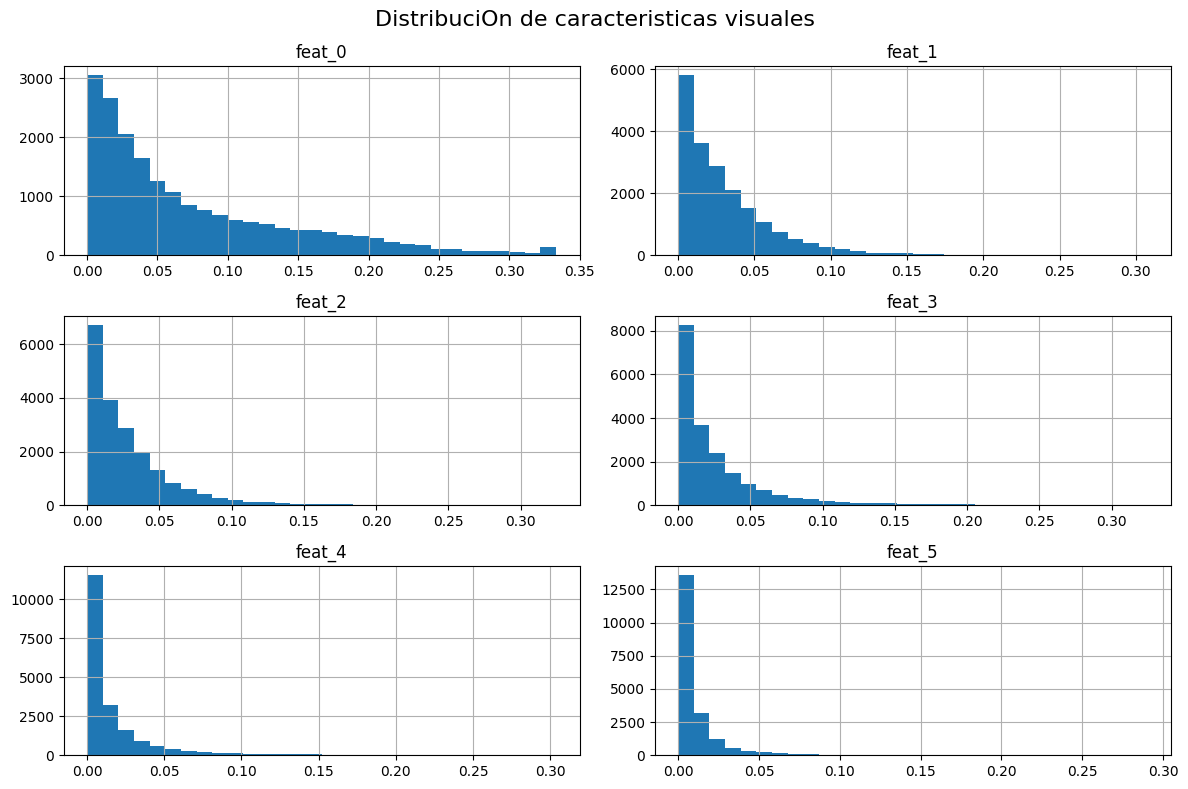

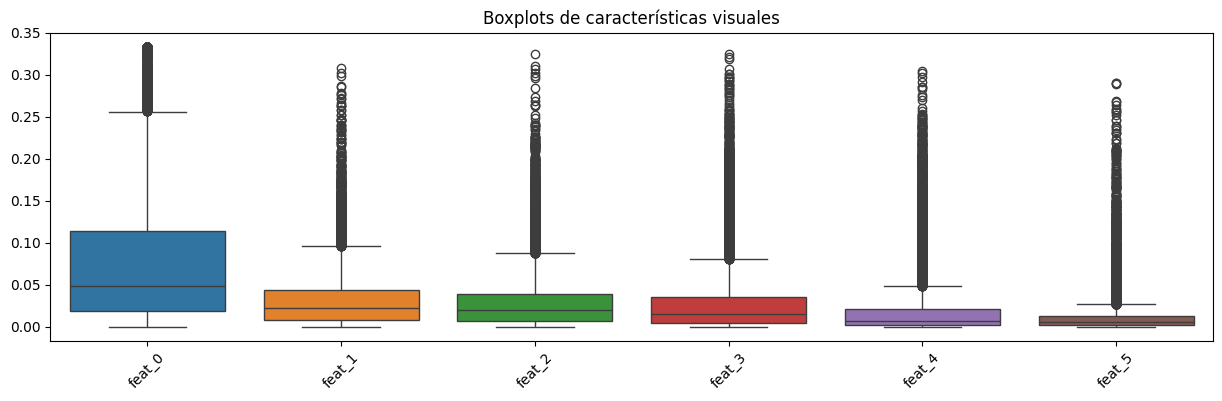

In [9]:
print(" Valores nulos por columna:")
print(df_features.isnull().sum())
print("\n Estadísticas descriptivas:")
print(df_features.describe().T.round(3))
# 4. Visualizar distribuciones (muestra de 6 features)
sample_cols = df_features.columns[1:7]  # Evitamos 'tmdbId'
df_features[sample_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("DistribuciOn de caracteristicas visuales", fontsize=16)
plt.tight_layout()
plt.show()

# 5. Boxplots para ver outliers
plt.figure(figsize=(15, 4))
sns.boxplot(data=df_features[sample_cols])
plt.title("Boxplots de características visuales")
plt.xticks(rotation=45)
plt.show()


NORMALIZAMOS LA DATA

In [10]:
# 2. Extraer solo las características (omitimos 'tmdbId')
X = df_features.drop(columns=["tmdbId"])

# 3. Escalar (normalizar) las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

APLICACIÓN DE PCA

In [11]:
# 4. Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [12]:
loading_df = pd.DataFrame(
    data=pca.components_,
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)
print(" Loadings de cada componente principal:")
print(loading_df.round(3))


 Loadings de cada componente principal:
     feat_0  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  \
PC1   0.197  -0.059  -0.062  -0.045  -0.011   0.022  -0.019  -0.038  -0.032   
PC2  -0.123   0.004   0.067   0.111   0.101   0.065   0.065   0.040   0.023   

     feat_9  ...  feat_95  feat_96  feat_97  feat_98  feat_99  feat_100  \
PC1  -0.035  ...    0.151   -0.184   -0.203   -0.228   -0.215    -0.177   
PC2   0.016  ...    0.072    0.081    0.104   -0.003    0.024     0.008   

     feat_101  feat_102  feat_103  feat_104  
PC1    -0.067    -0.233    -0.179     0.244  
PC2     0.085     0.060     0.140    -0.077  

[2 rows x 105 columns]


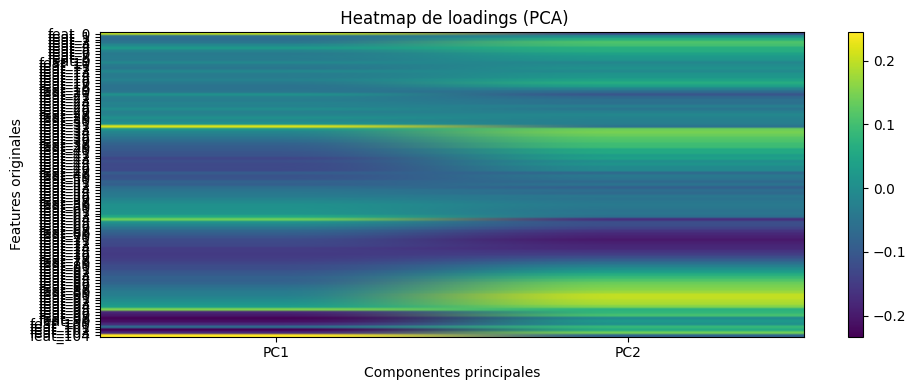

In [13]:
# 6. Heatmap de los loadings
plt.figure(figsize=(10, 4))
plt.imshow(pca.components_.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(pca.n_components_), [f"PC{i+1}" for i in range(pca.n_components_)])
plt.colorbar()
plt.title(" Heatmap de loadings (PCA)")
plt.xlabel("Componentes principales")
plt.ylabel("Features originales")
plt.tight_layout()
plt.show()


 Porcentaje de varianza explicada por componente
[0.1144 0.053 ]


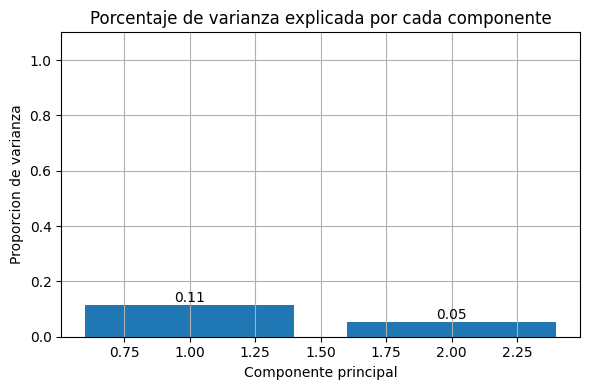

In [14]:
# 7. Porcentaje de varianza explicada

print(' Porcentaje de varianza explicada por componente')
print(pca.explained_variance_ratio_.round(4))

plt.figure(figsize=(6, 4))
plt.bar(
    x=np.arange(pca.n_components_) + 1,
    height=pca.explained_variance_ratio_
)
for i, var in enumerate(pca.explained_variance_ratio_):
    plt.text(i + 1, var + 0.01, f"{var:.2f}", ha='center')
plt.title("Porcentaje de varianza explicada por cada componente")
plt.xlabel("Componente principal")
plt.ylabel("Proporcion de varianza")
plt.ylim(0, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()


 Porcentaje de varianza explicada acumulada
[0.1144 0.1673]


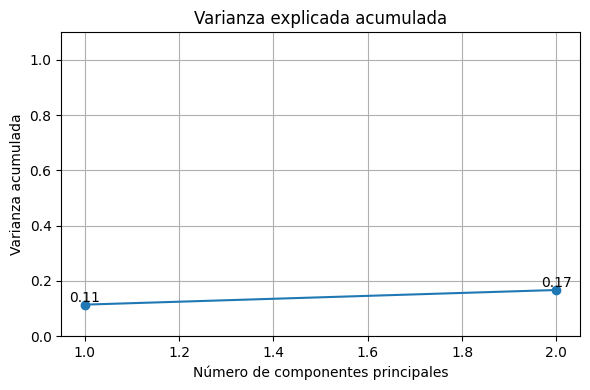

In [15]:
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print(' Porcentaje de varianza explicada acumulada')

print(prop_varianza_acum.round(4))

plt.figure(figsize=(6, 4))
plt.plot(
    np.arange(pca.n_components_) + 1,
    prop_varianza_acum,
    marker='o'
)
for i, var in enumerate(prop_varianza_acum):
    plt.text(i + 1, var + 0.01, f"{var:.2f}", ha='center')
plt.title("Varianza explicada acumulada")
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza acumulada")
plt.ylim(0, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# 5. Revisar varianza explicada
print(" Varianza explicada por componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", np.sum(pca.explained_variance_ratio_).round(4))


 Varianza explicada por componente: [0.11436066 0.05297059]
Varianza total explicada: 0.1673


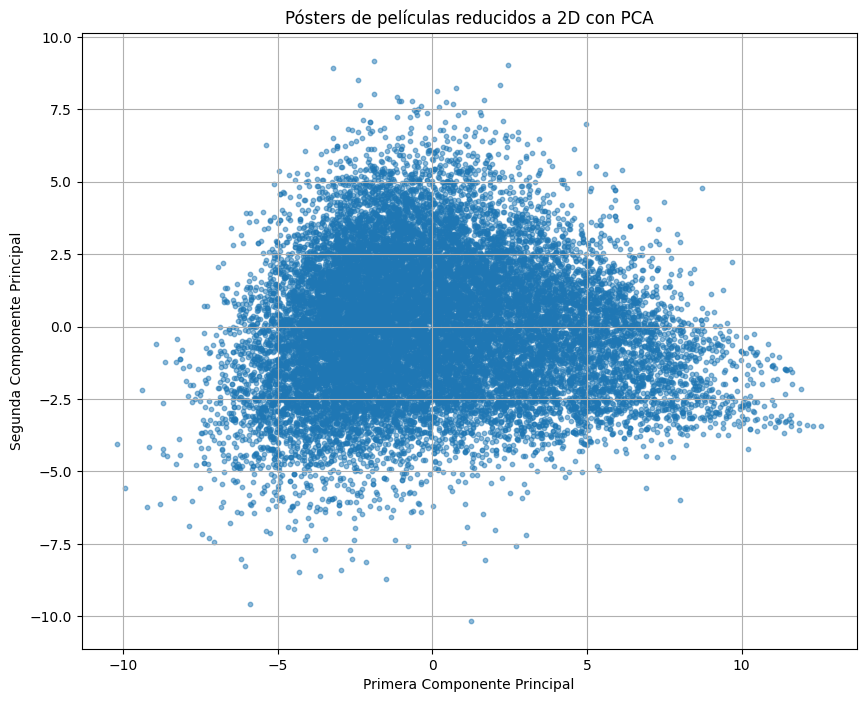

In [17]:
# 6. Visualizar los datos en 2D
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
plt.title("Pósters de películas reducidos a 2D con PCA")
plt.xlabel("Primera Componente Principal")
plt.ylabel("Segunda Componente Principal")
plt.grid(True)
plt.show()

 Autovalores ordenados:
[12.0085  5.5622  5.3364  3.9091  3.3824  3.238   2.6439  2.5382  2.2703
  2.0634  1.9583  1.8449  1.7866  1.6745  1.6375  1.5651  1.4595  1.3916
  1.3683  1.3015  1.2556  1.2425  1.1795  1.1215  1.0783  1.0339  1.0178
  0.9896  0.9499  0.9462  0.905   0.8807  0.8764  0.8615  0.8478  0.8346
  0.7867  0.7803  0.7689  0.7366  0.719   0.7113  0.701   0.6895  0.6882
  0.6773  0.6493  0.6461  0.6339  0.6279  0.6032  0.5989  0.5937  0.5887
  0.571   0.5609  0.5575  0.5423  0.5313  0.5256  0.5243  0.5094  0.5028
  0.4972  0.4854  0.4809  0.4761  0.4701  0.4548  0.4498  0.4434  0.434
  0.4326  0.4218  0.4181  0.4104  0.4026  0.3962  0.3896  0.3818  0.3685
  0.3611  0.3545  0.354   0.3405  0.3323  0.3277  0.3213  0.3114  0.3066
  0.2985  0.2882  0.2629  0.2597  0.23    0.2266  0.2226  0.179   0.1089
  0.0711  0.0484  0.      0.      0.      0.    ]

 Varianza explicada por componente 1: 0.114
 Varianza explicada por componente 2: 0.053
 Varianza total explicada (debería 

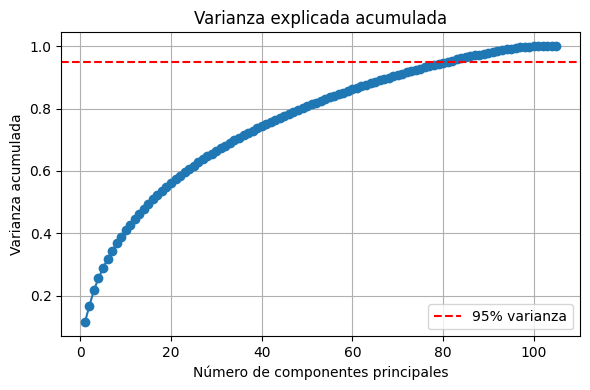

In [18]:
# 2. Obtener autovalores (varianzas explicadas)

pca_full = PCA(n_components=None)
pca_full.fit(X_scaled)

# 2. Obtener autovalores (varianzas explicadas)
eigenvalues_sorted = pca_full.explained_variance_
total_variance = np.sum(eigenvalues_sorted)
variance_ratio = eigenvalues_sorted / total_variance
eigenvalues_sorted = pca_full.explained_variance_
total_variance = np.sum(eigenvalues_sorted)
variance_ratio = eigenvalues_sorted / total_variance

# 3. Mostrar resultados
print(" Autovalores ordenados:")
print(np.round(eigenvalues_sorted, 4))

print(f"\n Varianza explicada por componente 1: {variance_ratio[0]:.3f}")
print(f" Varianza explicada por componente 2: {variance_ratio[1]:.3f}")
print(f" Varianza total explicada (debería ser 1.0): {np.sum(variance_ratio):.3f}")

# 4. ¿Cuantos componentes necesito para explicar el 95%?
varianza_acumulada = np.cumsum(variance_ratio)
n_comp_95 = np.argmax(varianza_acumulada >= 0.95) + 1
print(f"\n Se necesitan {n_comp_95} componentes para explicar el 95% de la varianza")

# curva de varianza acumulada
plt.figure(figsize=(6, 4))
plt.plot(np.arange(len(variance_ratio)) + 1, varianza_acumulada, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.title("Varianza explicada acumulada")
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza acumulada")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

APLICACIÓN DE SVD

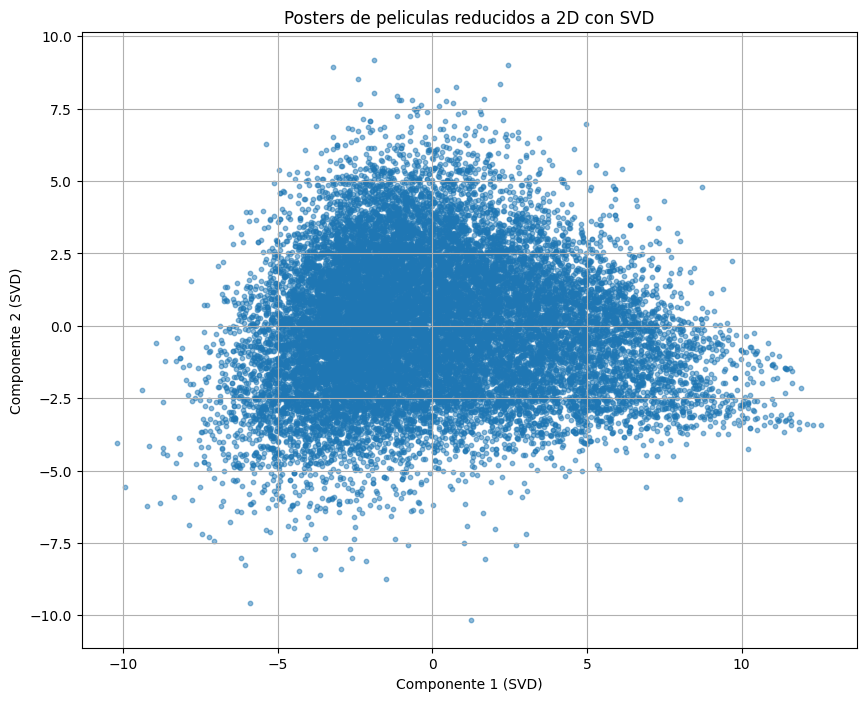

In [21]:

svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_scaled)

#  Visualizar resultados
plt.figure(figsize=(10, 8))
plt.scatter(X_svd[:, 0], X_svd[:, 1], alpha=0.5, s=10)
plt.title("Posters de peliculas reducidos a 2D con SVD")
plt.xlabel("Componente 1 (SVD)")
plt.ylabel("Componente 2 (SVD)")
plt.grid(True)
plt.show()

In [22]:
print(" Varianza explicada por cada componente (SVD):")
print(svd.explained_variance_ratio_.round(4))
print(f" Varianza total explicada: {np.sum(svd.explained_variance_ratio_):.4f}")

 Varianza explicada por cada componente (SVD):
[0.1144 0.053 ]
 Varianza total explicada: 0.1673



 Se necesitan 81 componentes para explicar el 95% de la varianza (SVD)


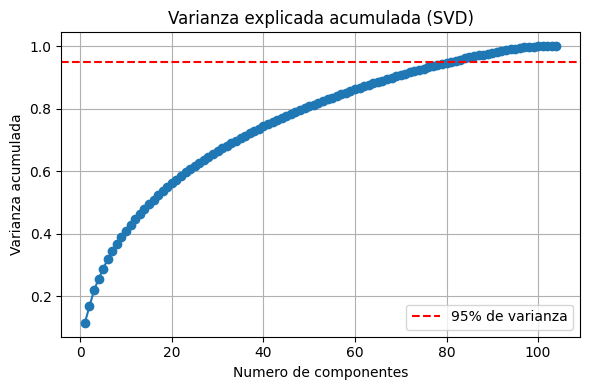

In [23]:
from sklearn.decomposition import TruncatedSVD

# Reentrenar con mayor cantidad de componentes
svd_full = TruncatedSVD(n_components=X_scaled.shape[1]-1, random_state=42)
svd_full.fit(X_scaled)

# Obtener proporciones de varianza explicada
varianza_ratio_svd = svd_full.explained_variance_ratio_
varianza_acum_svd = np.cumsum(varianza_ratio_svd)

# ¿Cuántos componentes para 95%?
n_comp_95_svd = np.argmax(varianza_acum_svd >= 0.95) + 1
print(f"\n Se necesitan {n_comp_95_svd} componentes para explicar el 95% de la varianza (SVD)")

# Curva
plt.figure(figsize=(6, 4))
plt.plot(np.arange(len(varianza_acum_svd)) + 1, varianza_acum_svd, marker='o')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% de varianza')
plt.title("Varianza explicada acumulada (SVD)")
plt.xlabel("Numero de componentes")
plt.ylabel("Varianza acumulada")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


 Se necesitan 81 componentes para explicar el 95% de la varianza (SVD) ENTONCES APLICAMOS SVD Y PCA PARA 81

In [24]:
pca_81 = PCA(n_components=81)
X_pca_81 = pca_81.fit_transform(X_scaled)


In [25]:
svd_81 = TruncatedSVD(n_components = 81)
svd_data_81 = svd.fit_transform(X_scaled)


# MODELOS DE CLUSTERING

## Kmeans

In [26]:
#encontrar elk optimo
def elbow_method(X, max_k=30):
    inertias = []
    silhouette_scores = []

    for k in range(2, max_k + 1):
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)

        inertias.append(model.inertia_)
        score = silhouette_score(X, model.labels_)
        silhouette_scores.append(score)

    # 4. Crear gráficos
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    ax[0].plot(range(2, max_k + 1), inertias, marker='s', linestyle='-', color='dodgerblue')
    ax[0].set_title("Método del Codo")
    ax[0].set_xlabel("Número de Clusters (k)")
    ax[0].set_ylabel("Inercia")
    ax[0].grid(True)

    ax[1].plot(range(2, max_k + 1), silhouette_scores, marker='s', linestyle='-', color='green')
    ax[1].set_title("Silhouette Score")
    ax[1].set_xlabel("Número de Clusters (k)")
    ax[1].set_ylabel("Score")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

    return inertias, silhouette_scores




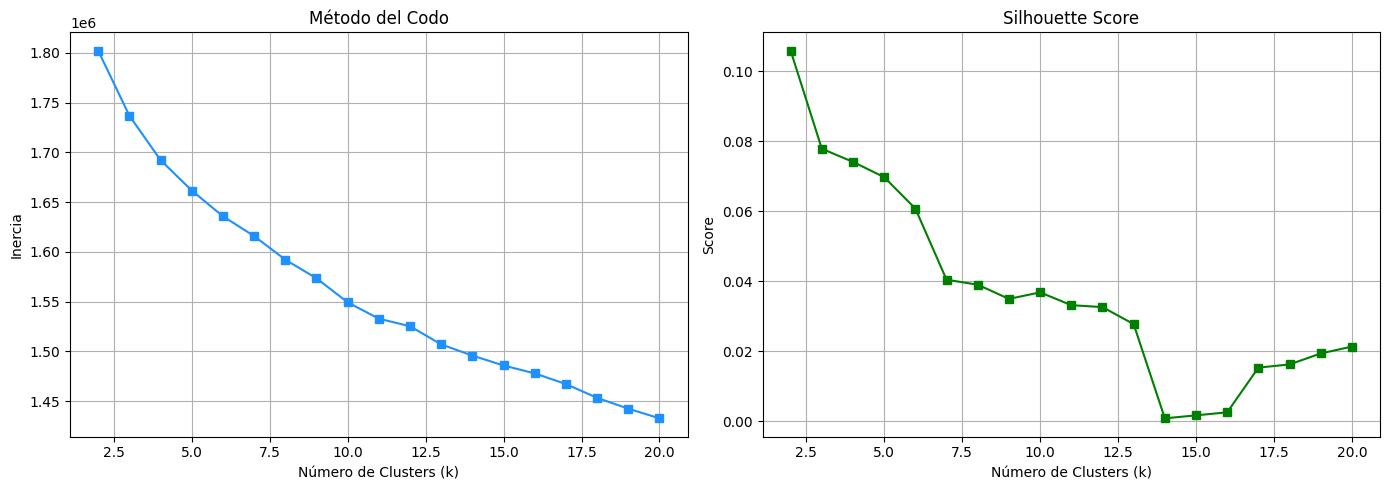

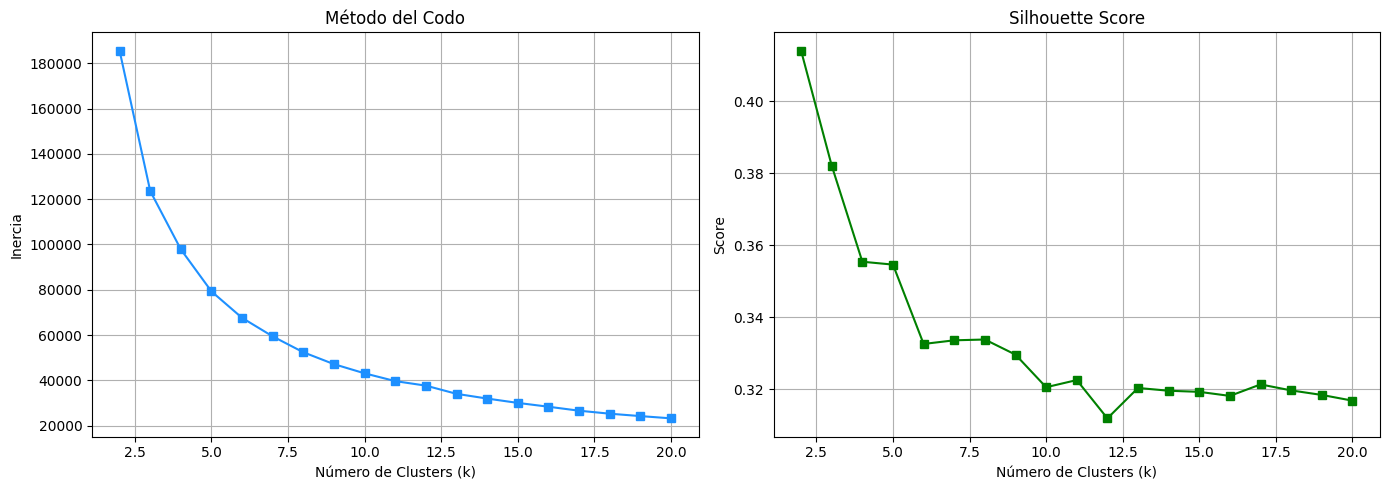

In [27]:
inertias, silhouette_scores = elbow_method(X_pca_81, max_k=20)
inertias, silhouette_scores = elbow_method(svd_data_81 , max_k=20)

In [28]:
def kmeans_scratch(X, k=3, max_iters=100, random_state=42):
     # Establecemos semilla aleatoria para reproducibilidad
    np.random.seed(random_state)
    X = X.to_numpy() if hasattr(X, "to_numpy") else X
    # Obtenemos dimensiones de los datos
    n_samples, n_features = X.shape

    # Inicializamos centroides aleatoriamente seleccionando k puntos de datos aleatorios
    initial_indices = np.random.choice(n_samples, size=k, replace=False)
    centroids = X[initial_indices]

    # Inicializamos array de etiquetas
    labels = np.zeros(n_samples)

    # Bucle principal de K-means
    for _ in range(max_iters):
        # Almacenamos los centroides antiguos para verificar convergencia
        old_centroids = centroids.copy()

        # Asignación
        for i in range(n_samples):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)

        # Actualización
        for j in range(k):
            points_in_cluster = X[labels == j]
            if len(points_in_cluster) > 0:
                centroids[j] = points_in_cluster.mean(axis=0)
            else:
                # Reasignamos los centroides vacíos
                centroids[j] = X[np.random.choice(n_samples)]


        # Verificamos convergencia
        if np.allclose(centroids, old_centroids):
            break

    return centroids, labels.astype(int)


##GMM


In [29]:
def inicializar_parametros(data, n_componentes):
    n, n_features = data.shape
    kmeans = KMeans(n_clusters=n_componentes).fit(data)
    means = kmeans.cluster_centers_
    covariances = np.array([np.cov(data, rowvar=False)] * n_componentes)
    weights = np.ones(n_componentes) / n_componentes
    return means, covariances, weights

def fix_covariance(covariance, regularization=1e-6):
    covariance += regularization * np.eye(covariance.shape[0])
    return covariance


def e_step(data, means, covariances, weights, n_componentes):
    n_muestras = data.shape[0]
    responsabilidades = np.zeros((n_muestras, n_componentes))

    for k in range(n_componentes):
        responsabilidades[:, k] = np.log(weights[k] + 1e-8) + multivariate_normal.logpdf(data, mean=means[k], cov=covariances[k])

    log_sum_exp = np.log(np.sum(np.exp(responsabilidades), axis=1))
    responsabilidades = np.exp(responsabilidades - log_sum_exp[:, np.newaxis])
    return responsabilidades


def m_step(data, responsabilidades, n_componentes):
    n_muestras, n_features = data.shape
    weights = responsabilidades.mean(axis=0)
    means = np.zeros((n_componentes, n_features))
    covariances = np.zeros((n_componentes, n_features, n_features))

    for k in range(n_componentes):
        r_k = responsabilidades[:, k]
        sum_r_k = r_k.sum()
        means[k] = np.sum(r_k[:, np.newaxis] * data, axis=0) / sum_r_k
        diff = data - means[k]
        covariances[k] = np.dot(r_k * diff.T, diff) / sum_r_k
        covariances[k] = fix_covariance(covariances[k])

    weights /= np.sum(weights)
    return means, covariances, weights


def fit_gmm(data, n_componentes, n_iter=100, tol=1e-3):
    means, covariances, weigths = inicializar_parametros(data, n_componentes)
    log_likelihood = 0

    for i in range(n_iter):
        prev = log_likelihood

        responsabilidades = e_step(data, means, covariances, weigths, n_componentes)
        means, covariances, weigths = m_step(data, responsabilidades, n_componentes)

        log_likelihood = np.sum([np.log(np.sum([weigths[k] * multivariate_normal.pdf(data, mean=means[k], cov=covariances[k]) for k in range(n_componentes)], axis=0))])

        if abs(log_likelihood - prev) < tol:
            break

    return means, covariances, weigths


def predict(data, means, covariances, n_componentes):
    probabilidades = np.zeros((data.shape[0], n_componentes))

    for k in range(n_componentes):
        probabilidades[:, k] = multivariate_normal.pdf(data, mean=means[k], cov=covariances[k])
    return np.argmax(probabilidades, axis=1)

##TRAINING

###Kmeans

In [30]:
centroids_pca, labels_pca = kmeans_scratch(X_pca_81, k=4)
centroids_svd, labels_svd = kmeans_scratch(svd_data_81, k=4)
print("Shape de labels:", labels_pca.shape)
print("Shape de labels:", labels_svd.shape)




Shape de labels: (19669,)
Shape de labels: (19669,)


GMM

In [31]:
gmm_pca = GaussianMixture(n_components=4, random_state=42)
gmm_pca.fit(X_pca_81)
labels_gmm_pca = gmm_pca.predict(X_pca_81)

gmm_svd = GaussianMixture(n_components=4, random_state=42)
gmm_svd.fit(svd_data_81)
labels_gmm_svd = gmm_svd.predict(svd_data_81)

##evaluación de métricas

In [32]:
import pandas as pdG
from sklearn.preprocessing import LabelEncoder

# Cargar datos
features_df = pd.read_csv("/content/drive/MyDrive/movie_project/poster_features.csv")
metadata_df = pd.read_csv("/content/drive/MyDrive/movie_project/posters_clean.csv")

# Asegurar tipos
features_df["tmdbId"] = features_df["tmdbId"].astype(int)
metadata_df["tmdbId"] = metadata_df["tmdbId"].astype(int)

# Unir por tmdbId y quedarnos con los generos
df = features_df.merge(metadata_df[["tmdbId", "genres"]], on="tmdbId")

# Extraer el primer genero como etiqueta
df["main_genre"] = df["genres"].apply(lambda x: x.split("|")[0] if pd.notnull(x) else "Unknown")
df["genre_label"] = LabelEncoder().fit_transform(df["main_genre"])



In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD

# Separar caracteristicas y etiquetas
X = df.drop(columns=["tmdbId", "genres", "main_genre", "genre_label"])
y_true = df["genre_label"].to_numpy()

# Escalar
X_scaled = StandardScaler().fit_transform(X)

# Reducir dimension con PCA y SVD
X_pca_81 = PCA(n_components=81).fit_transform(X_scaled)
X_svd_81 = TruncatedSVD(n_components=81).fit_transform(X_scaled)


In [34]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# KMeans
labels_kmeans_pca = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca_81)
labels_kmeans_svd = KMeans(n_clusters=4, random_state=42).fit_predict(X_svd_81)

# GMM
labels_gmm_pca = GaussianMixture(n_components=4, random_state=42).fit(X_pca_81).predict(X_pca_81)
labels_gmm_svd = GaussianMixture(n_components=4, random_state=42).fit(X_svd_81).predict(X_svd_81)


In [35]:

from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

def evaluar(nombre, X, labels, y_true):
    print(f"\n=== {nombre} ===")
    print("Silhouette Score:", silhouette_score(X, labels))
    print("ARI (vs género):", adjusted_rand_score(y_true, labels))
    print("Normalized MI (vs género):", normalized_mutual_info_score(y_true, labels))

evaluar("PCA + KMeans", X_pca_81, labels_kmeans_pca, y_true)
evaluar("PCA + GMM", X_pca_81, labels_gmm_pca, y_true)
evaluar("SVD + KMeans", X_svd_81, labels_kmeans_svd, y_true)
evaluar("SVD + GMM", X_svd_81, labels_gmm_svd, y_true)



=== PCA + KMeans ===
Silhouette Score: 0.07379155251275762
ARI (vs género): 0.010529326141841579
Normalized MI (vs género): 0.015229367907621085

=== PCA + GMM ===
Silhouette Score: -0.010657070423906161
ARI (vs género): 0.00023370861105103148
Normalized MI (vs género): 0.00729086973038054

=== SVD + KMeans ===
Silhouette Score: 0.07378214586157196
ARI (vs género): 0.010532182813739846
Normalized MI (vs género): 0.015223363834148294

=== SVD + GMM ===
Silhouette Score: -0.009518255816634076
ARI (vs género): 0.0001239723789967741
Normalized MI (vs género): 0.007296329523815592
